<a href="https://colab.research.google.com/github/risavh/KickstarterAnalysis/blob/main/EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#BOW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from pprint import pprint
from nltk import word_tokenize, pos_tag, ne_chunk
plt.style.use('fivethirtyeight')

import itertools
%matplotlib inline



In [ ]:
df=pd.read_csv('CK_4_1.csv')
df.shape

(50593, 38)

In [ ]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,371,Mario Cruz's stunning black and white photogra...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29684,US,the United States,1462266066,"{""id"":2066133663,""name"":""FotoEvidence"",""is_reg...",USD,$,...,talibes-modern-day-slaves-a-photo-book-by-mari...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1465460680,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29684.0,domestic
1,181,"After 10+ years of writing and performing, I'm...","{""id"":37,""name"":""Country & Folk"",""slug"":""music...",11295,US,the United States,1437589102,"{""id"":302755046,""name"":""Corey Baum"",""is_regist...",USD,$,...,croy-and-the-boys-debut-album-produced-by-adri...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1441492409,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11295.0,domestic
2,11,A college reporter's dreams of becoming a seri...,"{""id"":292,""name"":""Comedy"",""slug"":""film & video...",4471,US,the United States,1398630685,"{""id"":1104232624,""name"":""Adam Allen"",""is_regis...",USD,$,...,the-public-interest-an-edgy-offbeat-comedy-fea...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1404604604,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4471.0,domestic
3,0,My aim is to make hand-made human hair wigs fo...,"{""id"":269,""name"":""Ready-to-wear"",""slug"":""fashi...",0,GB,the United Kingdom,1511979365,"{""id"":1532567938,""name"":""Eda"",""is_registered"":...",GBP,£,...,human-hair-wig-for-chemotherapy-or-alopecia-pa...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1516349196,1.336296,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,domestic
4,75,Students of Columbia College's Dance/Movement ...,"{""id"":6,""name"":""Dance"",""slug"":""dance"",""positio...",2845,US,the United States,1315575820,"{""id"":480486253,""name"":""Heidi Landgraf"",""is_re...",USD,$,...,dance-movement-therapy-and-counseling-fall-stu...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1318461341,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2845.0,domestic


In [ ]:
df.loc[1].T

backers_count                                                             181
blurb                       After 10+ years of writing and performing, I'm...
category                    {"id":37,"name":"Country & Folk","slug":"music...
converted_pledged_amount                                                11295
country                                                                    US
country_displayable_name                                    the United States
created_at                                                         1437589102
creator                     {"id":302755046,"name":"Corey Baum","is_regist...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                        

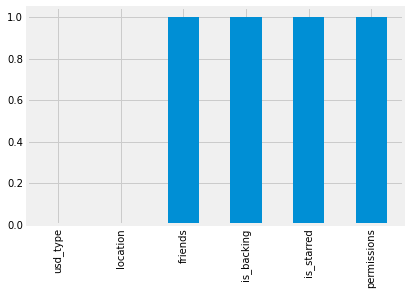

In [ ]:
missing_cols=df.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols.sort_values().plot(kind='bar')

In [ ]:
df1=df.loc[df['location'].notnull(),:].reset_index(drop=True)
df1.shape

(50539, 38)

In [ ]:
d_ctgy=pd.DataFrame(df1.category.apply(json.loads).values.tolist() )
d_location=pd.DataFrame(df1.location.apply(json.loads).values.tolist() )

In [ ]:
d_ctgy.columns=["ctgy_"+col for col in d_ctgy.columns]
d_location.columns=["lc_"+col for col in d_location.columns]

In [ ]:
cols_to_drop=['photo','category','location','friends','is_backing','permissions','is_starred','creator','source_url']

In [ ]:
df1.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
d_ctgy.shape

(50539, 8)

In [ ]:
d_location.shape

(50539, 12)

In [ ]:
d1=pd.concat([df1,d_location,d_ctgy],axis=1)
d1.shape

(50539, 49)

In [ ]:
missing_cols=d1.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols.sort_values()

lc_state            0.000217
usd_type            0.000613
lc_slug             0.002332
ctgy_parent_id      0.040203
ctgy_parent_name    0.216571
dtype: float64

In [ ]:
d1.loc[1].T

backers_count                                                             181
blurb                       After 10+ years of writing and performing, I'm...
converted_pledged_amount                                                11295
country                                                                    US
country_displayable_name                                    the United States
created_at                                                         1437589102
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           1441492408
disable_communication                                                   False
fx_rate                                                         

In [ ]:
cols_to_drop=['profile','urls','lc_urls','ctgy_urls','country_displayable_name','currency_symbol','currency_trailing_code','id','static_usd_rate','lc_id',\
              'lc_slug','lc_short_name','lc_displayable_name','lc_country',\
              'lc_is_root','ctgy_id','ctgy_position','ctgy_parent_id','ctgy_color']
d1.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
d1.loc[1].T

backers_count                                                             181
blurb                       After 10+ years of writing and performing, I'm...
converted_pledged_amount                                                11295
country                                                                    US
created_at                                                         1437589102
currency                                                                  USD
current_currency                                                          USD
deadline                                                           1441492408
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                                  10000.0
is_starrable                                                            False
launched_at                                                     

In [ ]:
d1['deadline']=d1.deadline.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['launched_at']=d1.launched_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['created_at']=d1.created_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['state_changed_at']=d1.state_changed_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))



In [ ]:
d1.loc[1].T

backers_count                                                             181
blurb                       After 10+ years of writing and performing, I'm...
converted_pledged_amount                                                11295
country                                                                    US
created_at                                                2015-07-22 18:18:22
currency                                                                  USD
current_currency                                                          USD
deadline                                                  2015-09-05 22:33:28
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                                  10000.0
is_starrable                                                            False
launched_at                                               2015-0

In [ ]:
d1.shape

(50539, 30)

In [ ]:
d1.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,...,usd_pledged,usd_type,lc_name,lc_localized_name,lc_state,lc_type,lc_expanded_country,ctgy_name,ctgy_slug,ctgy_parent_name
0,371,Mario Cruz's stunning black and white photogra...,29684,US,2016-05-03 09:01:06,USD,USD,2016-06-09 08:24:39,False,1.000000,...,29684.0,domestic,Dakar,Dakar,Dakar,Town,Senegal,Photobooks,photography/photobooks,Photography
1,181,"After 10+ years of writing and performing, I'm...",11295,US,2015-07-22 18:18:22,USD,USD,2015-09-05 22:33:28,False,1.000000,...,11295.0,domestic,Austin,Austin,TX,Town,United States,Country & Folk,music/country & folk,Music
2,11,A college reporter's dreams of becoming a seri...,4471,US,2014-04-27 20:31:25,USD,USD,2014-07-05 23:56:44,False,1.000000,...,4471.0,domestic,New York,New York,NY,Town,United States,Comedy,film & video/comedy,Film & Video
3,0,My aim is to make hand-made human hair wigs fo...,0,GB,2017-11-29 18:16:05,GBP,USD,2018-01-19 08:06:35,False,1.295882,...,0.0,domestic,Plymouth,Plymouth,England,Town,United Kingdom,Ready-to-wear,fashion/ready-to-wear,Fashion
4,75,Students of Columbia College's Dance/Movement ...,2845,US,2011-09-09 13:43:40,USD,USD,2011-10-12 23:15:28,False,1.000000,...,2845.0,domestic,Chicago,Chicago,IL,Town,United States,Dance,dance,NaN


In [ ]:
pd.to_datetime(d1['deadline'])

0       2016-06-09 08:24:39
1       2015-09-05 22:33:28
2       2014-07-05 23:56:44
3       2018-01-19 08:06:35
4       2011-10-12 23:15:28
                ...        
50534   2015-03-31 20:00:00
50535   2016-06-06 06:01:07
50536   2014-08-07 23:09:00
50537   2014-06-25 19:19:43
50538   2019-02-27 04:00:00
Name: deadline, Length: 50539, dtype: datetime64[ns]

In [ ]:
d1.state.value_counts()

successful    31197
failed        19342
Name: state, dtype: int64

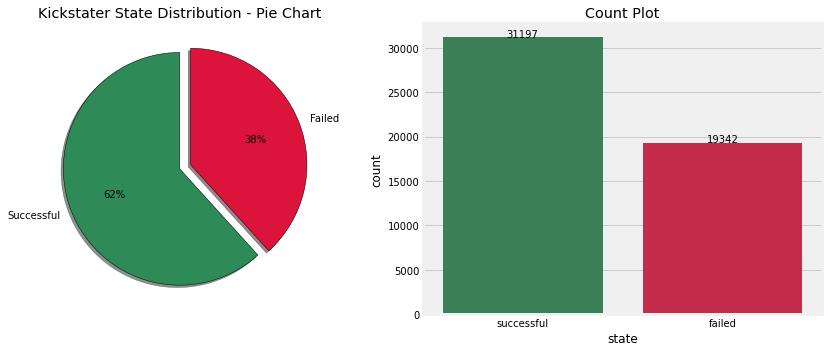

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
labels = ['Successful', 'Failed']
colors = ['seagreen', 'crimson']
explode = (0, 0.1)
ax[0].pie(d1.state.value_counts(), startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%',
        explode=explode, shadow=True,labels=labels,)
ax[0].set_title('Kickstater State Distribution - Pie Chart')

sns.countplot(x=d1.state,ax=ax[1],palette=colors)
for idx, row in pd.DataFrame(d1['state'].value_counts().reset_index()).iterrows():
    ax[1].text(idx,row.state, str(round(row.state)),color='black', ha="center")
ax[1].set_title("Count Plot")
plt.tight_layout()
plt.show()

In [ ]:
d1[["deadline", "launched_at", "created_at","state_changed_at"]] = d1[["deadline", "launched_at", "created_at","state_changed_at"]].apply(pd.to_datetime)


In [ ]:
d1['daysToDeadline']=(d1['deadline'] - d1['launched_at']).dt.days
d1['PreprationDays']=(d1['launched_at'] - d1['created_at']).dt.days
d1['daysToStateChange']=(d1['state_changed_at'] - d1['launched_at']).dt.days


In [ ]:
d1.ctgy_name.value_counts()

Web                1085
Tabletop Games     1003
Product Design      914
Comic Books         865
Accessories         859
                   ... 
Letterpress          26
Games                19
Social Practice      14
Chiptune             12
Taxidermy             3
Name: ctgy_name, Length: 160, dtype: int64

In [ ]:
d1.ctgy_name.value_counts().shape[0]

160

In [ ]:
d1.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,...,lc_localized_name,lc_state,lc_type,lc_expanded_country,ctgy_name,ctgy_slug,ctgy_parent_name,daysToDeadline,PreprationDays,daysToStateChange
0,371,Mario Cruz's stunning black and white photogra...,29684,US,2016-05-03 09:01:06,USD,USD,2016-06-09 08:24:39,False,1.000000,...,Dakar,Dakar,Town,Senegal,Photobooks,photography/photobooks,Photography,30,6,30
1,181,"After 10+ years of writing and performing, I'm...",11295,US,2015-07-22 18:18:22,USD,USD,2015-09-05 22:33:28,False,1.000000,...,Austin,TX,Town,United States,Country & Folk,music/country & folk,Music,30,15,30
2,11,A college reporter's dreams of becoming a seri...,4471,US,2014-04-27 20:31:25,USD,USD,2014-07-05 23:56:44,False,1.000000,...,New York,NY,Town,United States,Comedy,film & video/comedy,Film & Video,30,39,30
3,0,My aim is to make hand-made human hair wigs fo...,0,GB,2017-11-29 18:16:05,GBP,USD,2018-01-19 08:06:35,False,1.295882,...,Plymouth,England,Town,United Kingdom,Ready-to-wear,fashion/ready-to-wear,Fashion,50,0,50
4,75,Students of Columbia College's Dance/Movement ...,2845,US,2011-09-09 13:43:40,USD,USD,2011-10-12 23:15:28,False,1.000000,...,Chicago,IL,Town,United States,Dance,dance,NaN,30,3,30


In [ ]:
cols_to_use=['spotlight','ctgy_name','backers_count','pledged','goal','state', 'state_changed_at', 'created_at','launched_at', 'deadline','country', 'is_starrable','staff_pick','lc_state', 'lc_type',
       'lc_expanded_country','usd_exchange_rate', 'usd_pledged',
       'usd_type',]

In [ ]:
cols_to_use=['spotlight','ctgy_name','backers_count','pledged','goal','state', 'state_changed_at', 'created_at','launched_at', 'deadline','country', 'is_starrable','staff_pick']

In [ ]:
d1[cols_to_use].head()

,spotlight,ctgy_name,backers_count,pledged,goal,state,state_changed_at,created_at,launched_at,deadline,country,is_starrable,staff_pick
0,True,Photobooks,371,29684.0,28000.0,successful,2016-06-09 08:24:40,2016-05-03 09:01:06,2016-05-10 08:24:39,2016-06-09 08:24:39,US,False,True
1,True,Country & Folk,181,11295.0,10000.0,successful,2015-09-05 22:33:29,2015-07-22 18:18:22,2015-08-06 22:33:28,2015-09-05 22:33:28,US,False,False
2,False,Comedy,11,4471.0,100000.0,failed,2014-07-05 23:56:44,2014-04-27 20:31:25,2014-06-05 23:56:44,2014-07-05 23:56:44,US,False,False
3,False,Ready-to-wear,0,0.0,1000.0,failed,2018-01-19 08:06:36,2017-11-29 18:16:05,2017-11-30 08:06:35,2018-01-19 08:06:35,GB,False,False
4,True,Dance,75,2845.0,2500.0,successful,2011-10-12 23:15:41,2011-09-09 13:43:40,2011-09-12 23:15:28,2011-10-12 23:15:28,US,False,False


In [ ]:
d1.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'usd_pledged', 'usd_type', 'lc_name',
       'lc_localized_name', 'lc_state', 'lc_type', 'lc_expanded_country',
       'ctgy_name', 'ctgy_slug', 'ctgy_parent_name', 'daysToDeadline',
       'PreprationDays', 'daysToStateChange'],
      dtype='object')

In [ ]:
d1[['converted_pledged_amount','usd_pledged','goal','ctgy_name','state']]

,converted_pledged_amount,usd_pledged,goal,ctgy_name,state
0,29684,29684.00,28000.0,Photobooks,successful
1,11295,11295.00,10000.0,Country & Folk,successful
2,4471,4471.00,100000.0,Comedy,failed
3,0,0.00,1000.0,Ready-to-wear,failed
4,2845,2845.00,2500.0,Dance,successful
...,...,...,...,...,...
50534,40,40.00,10000.0,Childrenswear,failed
50535,2503,2503.00,2500.0,Rock,successful
50536,17,17.99,10.0,Apparel,successful
50537,0,0.00,1200.0,Faith,failed


In [ ]:
d1.loc[d1.state=='failed',['converted_pledged_amount','usd_pledged','goal','ctgy_name','state']].head()

,converted_pledged_amount,usd_pledged,goal,ctgy_name,state
2,4471,4471.000000,100000.0,Comedy,failed
3,0,0.000000,1000.0,Ready-to-wear,failed
5,6718,6849.432872,40000.0,Web,failed
7,50,50.000000,10000.0,Immersive,failed
8,70,70.170055,5000.0,Digital Art,failed


In [ ]:
def fxn_hist_box_plot(df,col):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    #sns.violinplot(df[col],ax=ax[0],color='teal',cut=2)
    sns.boxplot(df[col],ax=ax[0],color='teal')
    ax[0].set_title('Box plot')
    
    ax[0].set_xlabel(col)


    sns.distplot(df[col],ax=ax[1],color='tomato')
    ax[1].axvline(df[col].mean(),  label='Mean',color='teal')
    ax[1].axvline(df[col].median(),  label='Median',linestyle='dotted',color='black')
    ax[1].set_xlabel(col)

    ax[1].set_title('Histogram')
    tit1='Distribution of '+col
    plt.suptitle(tit1)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [ ]:
d1.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'usd_pledged', 'usd_type', 'lc_name',
       'lc_localized_name', 'lc_state', 'lc_type', 'lc_expanded_country',
       'ctgy_name', 'ctgy_slug', 'ctgy_parent_name', 'daysToDeadline',
       'PreprationDays', 'daysToStateChange'],
      dtype='object')

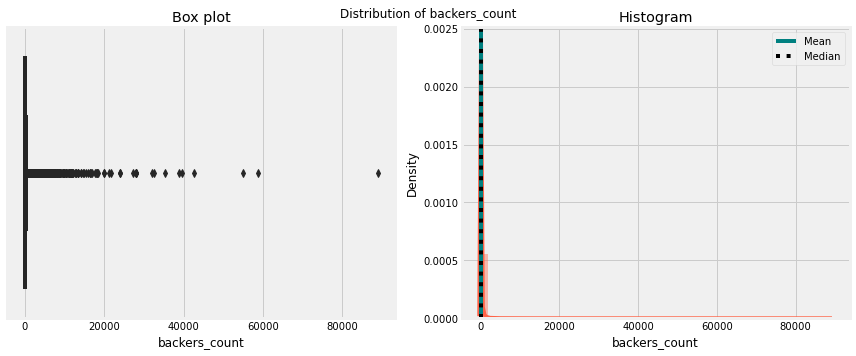

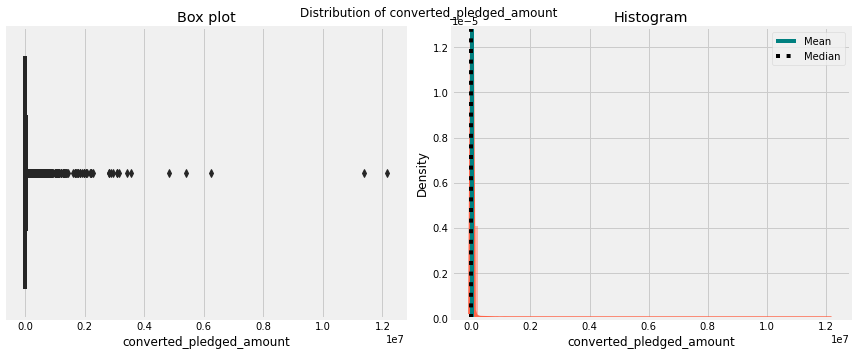

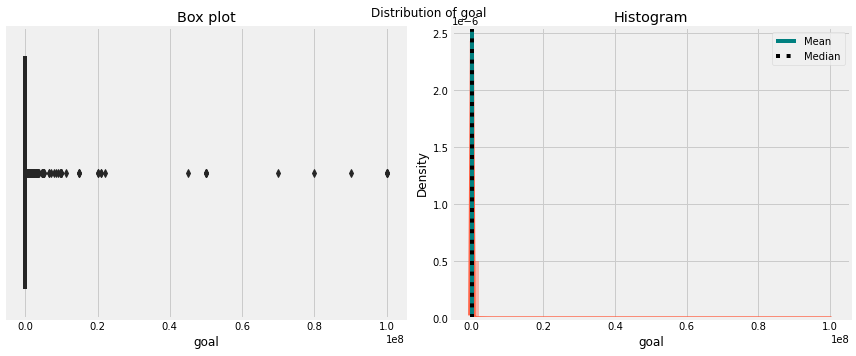

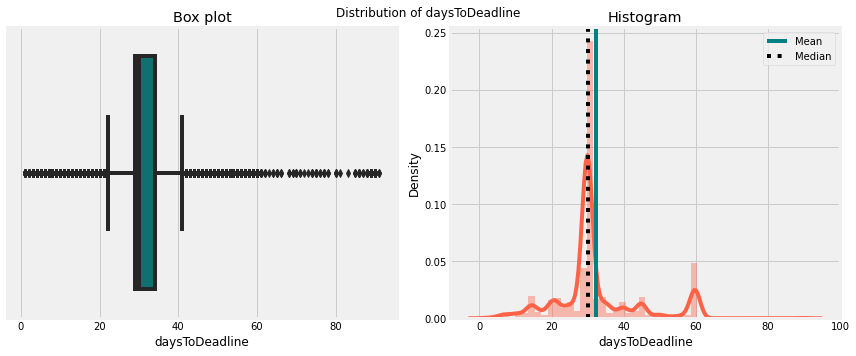

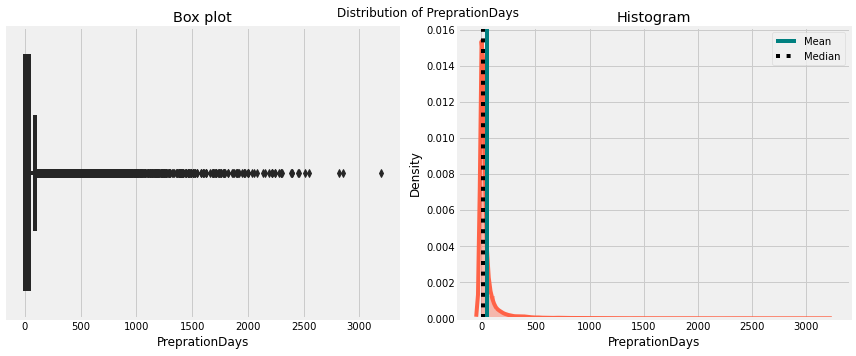

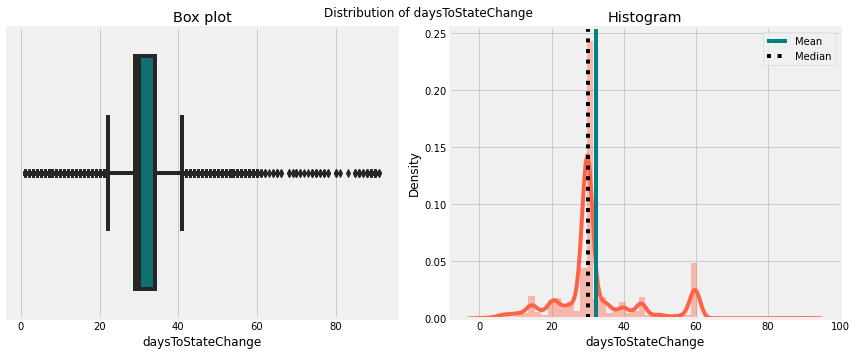

In [ ]:
num_cols=['backers_count','converted_pledged_amount','goal','daysToDeadline','PreprationDays', 'daysToStateChange']
for col in num_cols:
    fxn_hist_box_plot(d1,col)

In [ ]:
# ps = PorterStemmer()
# def preprocess_content(input_qns):
#     #input_qns = re.sub('[^a-zA-Z]'," ",input_qns)
#     #input_qns = input_qns.lower()
#     #input_qns=[ps.stem(word) for word in input_qns.split() if word not in set(stopwords.words('english'))]
#     input_qns=[word for word in input_qns.split() if word not in set(stopwords.words('english'))]
#     return " ".join(input_qns)

In [ ]:
# %%time
# d1['blurb_Rev1']=d1.blurb.astype('str').apply(preprocess_content)

In [ ]:
df_num=d1[num_cols]
df_num.head()

,backers_count,converted_pledged_amount,goal,daysToDeadline,PreprationDays,daysToStateChange
0,371,29684,28000.0,30,6,30
1,181,11295,10000.0,30,15,30
2,11,4471,100000.0,30,39,30
3,0,0,1000.0,50,0,50
4,75,2845,2500.0,30,3,30


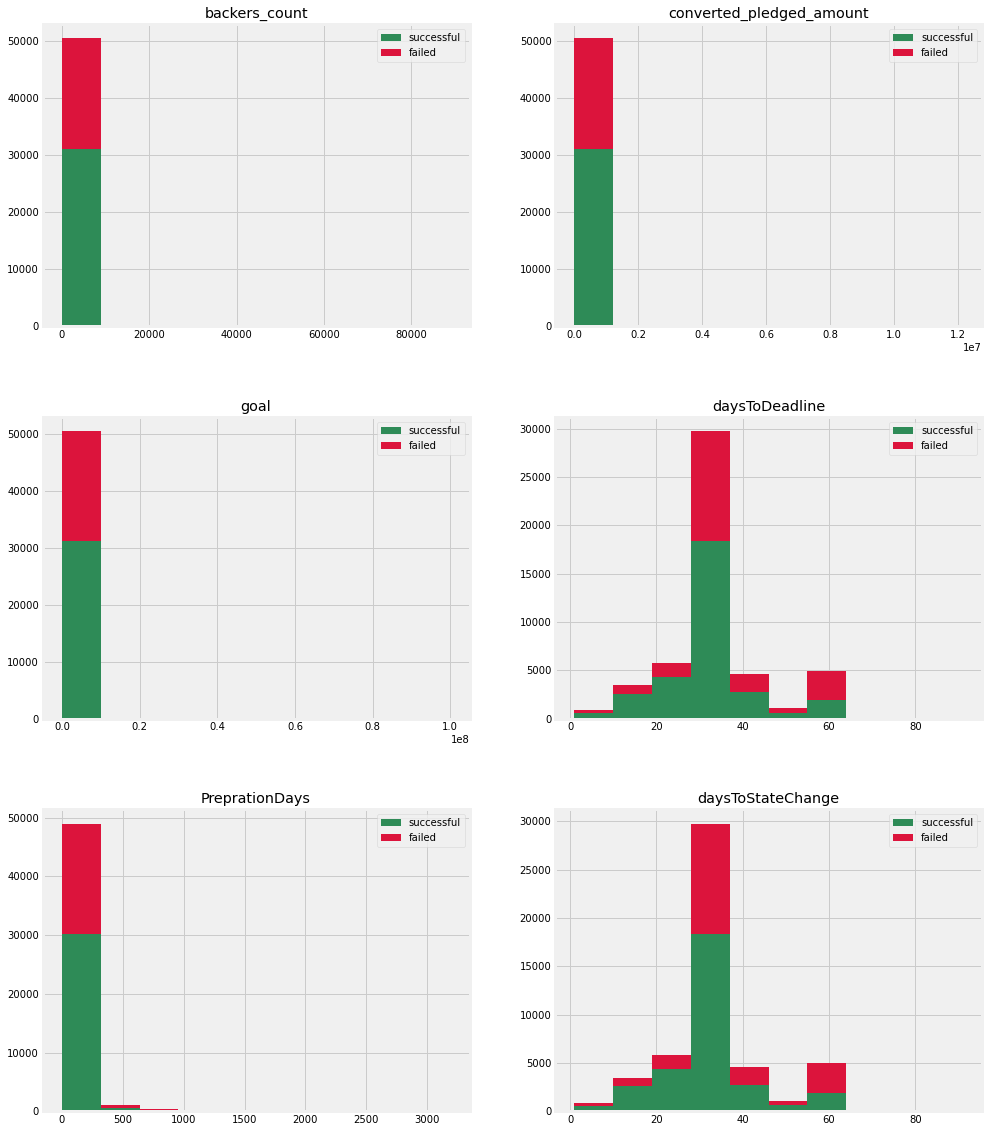

In [ ]:
columns = df_num.columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/3,j+1)
    plt.hist(x = [d1[d1['state']=='successful'][i], d1[d1['state']=='failed'][i]], 
         stacked=True, color = ['seagreen','crimson'],label = ['successful','failed'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")
    

## Bivariate Analysis

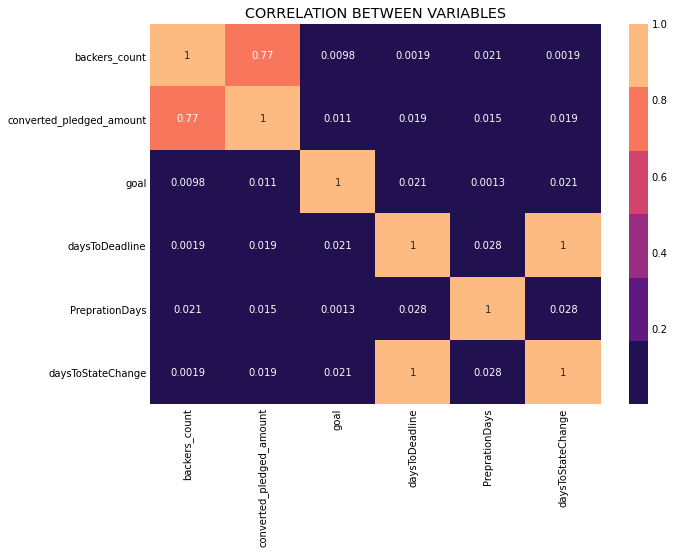

In [ ]:
correlation = df_num.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

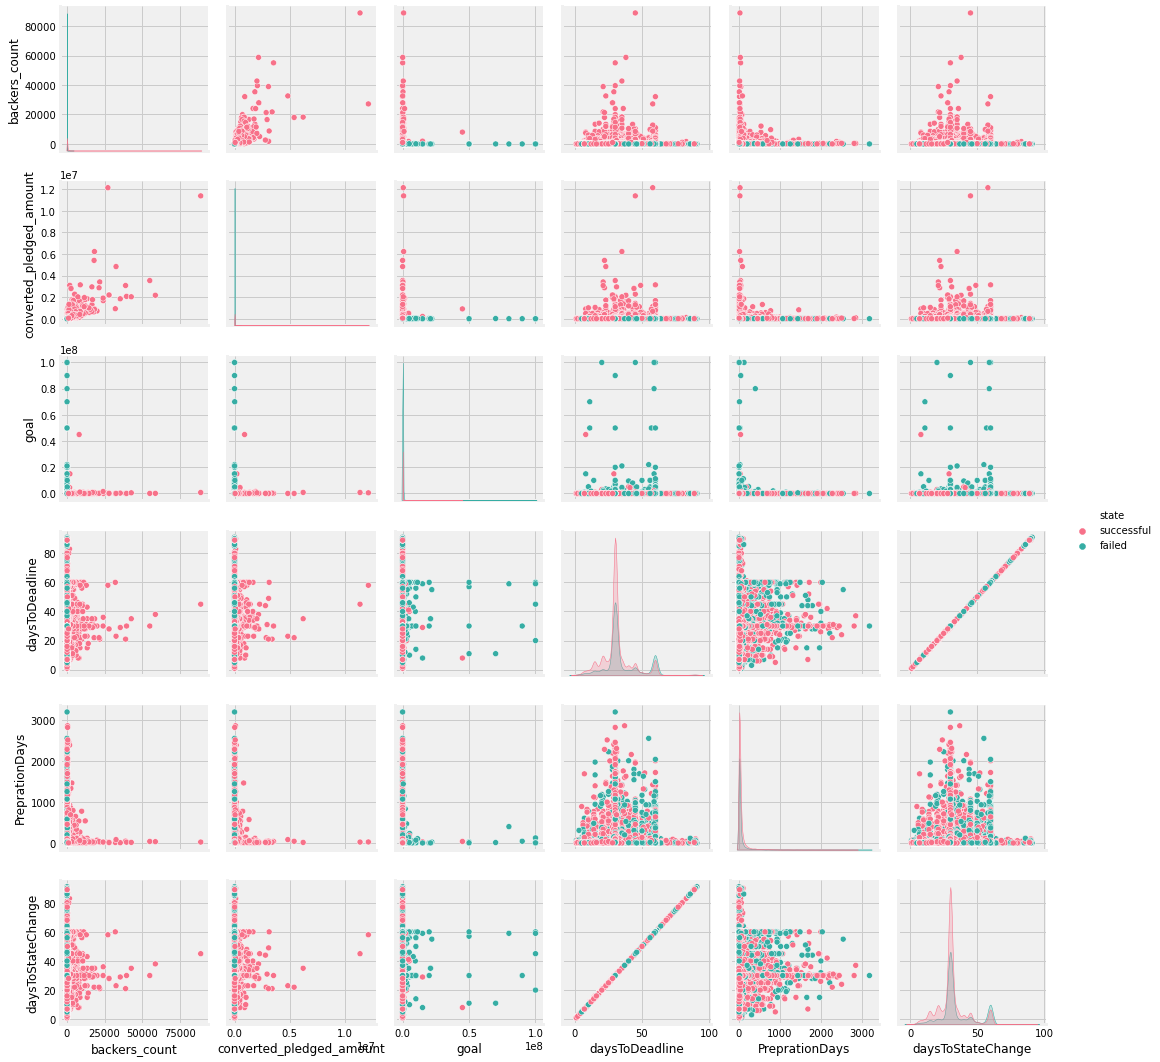

In [ ]:
sns.pairplot(d1,hue='state',\
             vars=list(df_num.columns)
            , palette="husl")
plt.show()

In [ ]:
d1.deadline.max()

Timestamp('2020-04-16 01:00:00')

In [ ]:
d1.deadline.min()

Timestamp('2009-06-06 05:00:00')

In [ ]:
d1.launched_at.max()

Timestamp('2020-04-01 23:31:35')

In [ ]:
d1.launched_at.min()

Timestamp('2009-05-04 23:48:21')

In [ ]:
d1.deadline.dt.year.value_counts()

2019    9806
2015    8633
2016    6836
2017    6636
2018    6530
2014    5726
2013    2457
2012    1818
2020    1000
2011     849
2010     230
2009      18
Name: deadline, dtype: int64

In [ ]:
d1.launched_at.dt.year.value_counts()

2019    9756
2015    8709
2016    6749
2017    6646
2018    6526
2014    6022
2013    2488
2012    1847
2011     898
2020     594
2010     270
2009      34
Name: launched_at, dtype: int64

In [ ]:
d1.launched_at.dt.month.value_counts()

10    4799
7     4793
11    4495
5     4457
8     4332
9     4332
6     4295
3     4278
4     4075
2     3922
1     3889
12    2872
Name: launched_at, dtype: int64